# Principal component analysis tutorial
This notebook is a Python implementation of *Chapter 3* of [this tutorial](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf).

This tutorial is designed to give the reader an understanding of Principal Components
Analysis (PCA).

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)

In [3]:
def draw_scatter_plot(x, y, limits):
    f, ax = plt.subplots()
    plt.scatter(x, y, marker='x')
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    plt.gca().set_aspect('equal', adjustable='box')

## Data
This data set has only got 2
dimensions, and the reason why is that I can provide plots of the
data to show what the PCA analysis is doing at each step.

In [4]:
x = [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1]

In [5]:
y = [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]

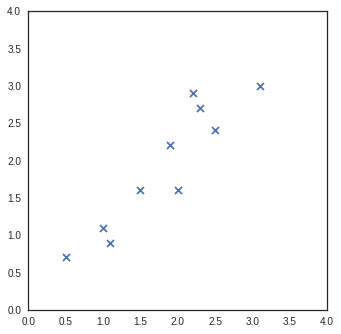

In [6]:
draw_scatter_plot(x, y, [0, 4])

In [7]:
data = list(zip(x, y))
data = pd.DataFrame(data=data, columns=['x', 'y'])

## Subtract the mean
For PCA to work properly, you have to subtract the mean from each of the data dimensions.

In [8]:
adjusted_data = data - data.mean(axis=0)

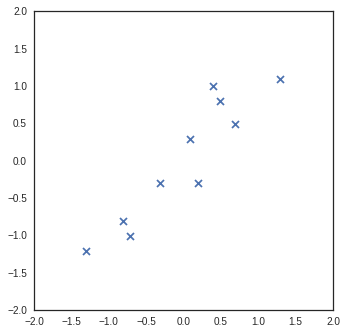

In [9]:
draw_scatter_plot(adjusted_data['x'], adjusted_data['y'], [-2, 2])

## Calculate the covariance matrix
Standard deviation and variance only operate on 1 dimension, so that you could
only calculate the standard deviation for each dimension of the data set independently
of the other dimensions. However, it is useful to have a similar measure to find out how
much the dimensions vary from the mean with respect to each other.

Covariance is such a measure. Covariance is always measured between 2 dimensions.

Since the data is 2 dimensional, the covariance matrix will be 2 X 2.

In [10]:
covariance_matrix = adjusted_data.cov()

In [11]:
covariance_matrix

,x,y
x,0.616556,0.615444
y,0.615444,0.716556


So, since the non-diagonal elements in this covariance matrix are positive, we should
expect that both the x and y variable increase together.

## Calculate the eigenvectors and eigenvalues of the covariance matrix
You should first know that eigenvectors
can only be found for square matrices. And, not every square matrix has eigenvectors.
And, given an n X n matrix that does have eigenvectors, there are n of them.

Another property of eigenvectors is that even if I scale the vector by some amount
before I multiply it, I still get the same multiple of it as a result. This
is because if you scale a vector by some amount, all you are doing is making it longer, not changing it’s direction.

Lastly, all the eigenvectors of a matrix are perpendicular,
i.e. at right angles to each other, no matter how many dimensions you have.

Since the covariance matrix is square, we can calculate the eigenvectors and eigenvalues
for this matrix. These are rather important, as they tell us useful information about
our data.

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [13]:
eigenvectors

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

In [14]:
eigenvalues

array([ 0.0490834 ,  1.28402771])

In [15]:
eigenvector_1 = eigenvectors[:,0]
slope_1 = eigenvector_1[0] / eigenvector_1[1]
eigenvector_1

array([-0.73517866,  0.6778734 ])

In [16]:
eigenvector_2 = eigenvectors[:,1]
slope_2 = eigenvector_2[0] / eigenvector_2[1]
eigenvector_2

array([-0.6778734 , -0.73517866])

Let's draw the two eigenvectors.

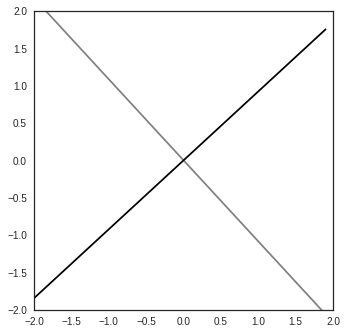

In [17]:
f, ax = plt.subplots()
X = np.arange(-2.0, 2.0, 0.1)
plt.plot(X, X * slope_1, 'gray')
plt.plot(X, X * slope_2, 'black')

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')

## Feature vector

The eigenvector with the highest eigenvalue is the principle component of the data set. In general, once eigenvectors are found from the covariance matrix, the next step is to order them by eigenvalue, highest to lowest.

You can decide to ignore the components of
lesser significance. You do lose some information, but if the eigenvalues are small, you
don’t lose much. If you leave out some components, the final data set will have less
dimensions than the original. To be precise, if you originally have n dimensions in
your data, and so you calculate n eigenvectors and eigenvalues, and then you choose
only the first p eigenvectors, then the final data set has only p dimensions.

Feature vector is just a fancy name for a matrix of vectors. This is constructed by taking the eigenvectors
that you want to keep from the list of eigenvectors, and forming a matrix with these
eigenvectors in the columns.

In [18]:
feature_vector_reduced = eigenvectors[:, np.argmax(eigenvalues)]
feature_vector_reduced

array([-0.6778734 , -0.73517866])

In [19]:
feature_vector_full = eigenvectors

## Deriving the new data set

We simply take the transpose of the vector and multiply it on the left of the original data set, transposed.

In [20]:
trasformed_data_full = np.dot(feature_vector_full.T, adjusted_data.T)

What will this give us? It will give us the original data solely in terms of the vectors we chose.

In the case of keeping **both eigenvectors** for the transformation, this plot is basically the original data, rotated so that the
eigenvectors are the axes. This is understandable since we have lost no information in
this decomposition.

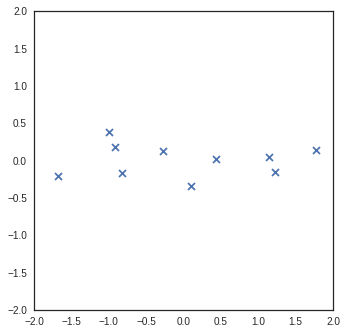

In [21]:
trasformed_data_full[1] # x
trasformed_data_full[0] # y

draw_scatter_plot(trasformed_data_full[1], trasformed_data_full[0], [-2, 2])

The other transformation we can make is by taking only the eigenvector with the
largest eigenvalue.

In [22]:
trasformed_data_reduced = np.dot(feature_vector_reduced.T, adjusted_data.T)
trasformed_data_reduced

array([-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
       -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056])

This data set is exactly the
first column of the other.

So, if you were to plot this data, it would be 1 dimensional,
and would be points on a line in exactly the x positions of the points in the plot.

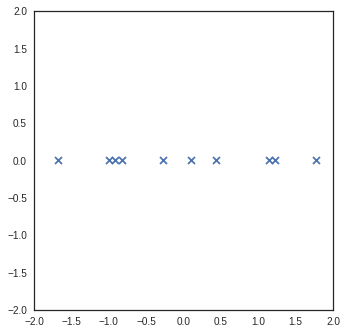

In [23]:
draw_scatter_plot(trasformed_data_reduced, [0] * len(trasformed_data_reduced), [-2, 2])

## Conclusions

We have transformed our data so that is
expressed in terms of the patterns between them, where the patterns are the lines that
most closely describe the relationships between the data.